## Entendimiento del archivo de Siniestros Viales

**Realizado por:** Sara Sofía Cárdenas Rodríguez y Jhoan Sebastián Sánchez Suárez 

**Archivo:** `historico_siniestros_bogota_2017.csv`

## 0. Inicialización

Importaciones

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tabulate import tabulate

Visualización de tablas y gráficas

In [53]:
sns.set_style("darkgrid")

def print_table(df):
    print(tabulate(df, headers='keys', tablefmt='simple_outline'))

Lectura del archivo

In [54]:
df =  pd.read_csv("historico_siniestros_bogota_2017.csv")
df = df.rename(columns={'Unnamed: 0': 'ID'}) # Renombrar primera columna
df.head()

,ID,OBJECTID,FORMULARIO,CODIGO_ACCIDENTE,FECHA_OCURRENCIA_ACC,HORA_OCURRENCIA_ACC,ANO_OCURRENCIA_ACC,MES_OCURRENCIA_ACC,DIA_OCURRENCIA_ACC,DIRECCION,GRAVEDAD,CLASE_ACC,LOCALIDAD,MUNICIPIO,FECHA_HORA_ACC,LATITUD,LONGITUD,CIV,PK_CALZADA
0,840142,451106,A001393604,10565887.0,1647406800000,06:34:00,2022.0,MARZO,MIERCOLES,KR 86 72 02,SOLO DANOS,CHOQUE,ENGATIVA,BOGOTA DC,1647430440000,4.696000,-74.106000,10006480.0,514011.0
1,747565,728008,AA001057402,11115230.0,1571374800000,19:30:00,2019.0,OCTUBRE,VIERNES,KR 50-CL 3 2,CON HERIDOS,CHOQUE,PUENTE ARANDA,BOGOTA DC,1571445000000,4.615541,-74.114489,16004606.0,513766.0
2,744198,372498,A001055948,10499024.0,1570165200000,09:15:00,2019.0,OCTUBRE,VIERNES,KR 7-CL 71 21,SOLO DANOS,CHOQUE,CHAPINERO,BOGOTA DC,1570198500000,4.654296,-74.055749,2001162.0,36812.0
3,570467,631431,AA000552205,11001813.0,1486530000000,10:00:00,2017.0,FEBRERO,MIERCOLES,AV AVENIDA BOYACA-CL 127 02,SOLO DANOS,CHOQUE,SUBA,BOGOTA DC,1486566000000,4.709924,-74.079962,11010306.0,604024.0
4,590737,303501,A000607860,4483415.0,1496120400000,17:50:00,2017.0,MAYO,MARTES,KR 79F-CL 47B S 02,CON HERIDOS,ATROPELLO,KENNEDY,BOGOTA DC,1496184600000,4.618101,-74.168603,8007308.0,245247.0


Información del archivo

El DataFrame tiene 165.830 filas y 19 columnas

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165830 entries, 0 to 165829
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    165830 non-null  int64  
 1   OBJECTID              165830 non-null  int64  
 2   FORMULARIO            165830 non-null  object 
 3   CODIGO_ACCIDENTE      165830 non-null  float64
 4   FECHA_OCURRENCIA_ACC  165830 non-null  int64  
 5   HORA_OCURRENCIA_ACC   165830 non-null  object 
 6   ANO_OCURRENCIA_ACC    165830 non-null  float64
 7   MES_OCURRENCIA_ACC    165830 non-null  object 
 8   DIA_OCURRENCIA_ACC    165830 non-null  object 
 9   DIRECCION             165830 non-null  object 
 10  GRAVEDAD              165830 non-null  object 
 11  CLASE_ACC             165830 non-null  object 
 12  LOCALIDAD             165830 non-null  object 
 13  MUNICIPIO             165830 non-null  object 
 14  FECHA_HORA_ACC        165830 non-null  int64  
 15  

## 1. Variables categóricas por tipo de dato

Variables categóricas encontradas

In [56]:
non_numeric_attributes = df.select_dtypes(exclude=['number']).columns.values
pd.DataFrame(non_numeric_attributes, columns=['Non Numeric Attributes'])

,Non Numeric Attributes
0,FORMULARIO
1,HORA_OCURRENCIA_ACC
2,MES_OCURRENCIA_ACC
3,DIA_OCURRENCIA_ACC
4,DIRECCION
5,GRAVEDAD
6,CLASE_ACC
7,LOCALIDAD
8,MUNICIPIO


Conteo de filas, cantidad de filas únicas, moda y su frecuencia

In [57]:
df[non_numeric_attributes].describe()

,FORMULARIO,HORA_OCURRENCIA_ACC,MES_OCURRENCIA_ACC,DIA_OCURRENCIA_ACC,DIRECCION,GRAVEDAD,CLASE_ACC,LOCALIDAD,MUNICIPIO
count,165830,165830,165830,165830,165830,165830,165830,165830,165830
unique,165830,1440,12,7,75313,3,7,20,1
top,A000758580,14:00:00,MARZO,VIERNES,KR 80-CL 2 51,SOLO DANOS,CHOQUE,KENNEDY,BOGOTA DC
freq,1,1797,15073,26811,168,94228,139853,20151,165830


**Hallazgos:**

- No hay valores nulos
- El formulario es único en el dataset
- Se tienen 1440 horas de ocurrencia, es decir, exactamente todas las combinaciones de horas militares y minutos
- La hora de ocurrencia más común es las 2 de la tarde
- Se tienen todos los meses del año
- El mes de ocurrencia más común es marzo
- Se tienen todos los días de la semana
- El día de ocurrencia más común es el viernes
- Hay 3 tipos de gravedades
- La gravedad más común es 'solo daños'
- Hay 7 tipos de clases de accidentes
- El tipo de accidente más común es 'choque'
- Se tienen todas las 20 localidades de Bogotá
- La localidad más común es Kennedy
- El municipio siempre es Bogotá, como es esperado

Conteos y porcentajes para cada valor único en las columnas

In [58]:
for col in non_numeric_attributes:
    print(col)
    attribute = df[col].value_counts()
    df_attribute = pd.DataFrame({
        f"{col} values": attribute.index,
        "Count": attribute.values,
        "Percentage (%)": attribute.values * 100 / attribute.values.sum()
    }).sort_values(by="Count", ascending=False)

    print(f"\n--- TOP 10 ---")
    print_table(df_attribute.head(10))

    if len(df_attribute) > 10:
        print(f"\n--- BOTTOM 10 ---")
        print_table(df_attribute.tail(10))

FORMULARIO

--- TOP 10 ---
┌────────┬─────────────────────┬─────────┬──────────────────┐
│        │ FORMULARIO values   │   Count │   Percentage (%) │
├────────┼─────────────────────┼─────────┼──────────────────┤
│ 165829 │ AA000910168         │       1 │      0.000603027 │
│      0 │ A000758580          │       1 │      0.000603027 │
│      1 │ A001393604          │       1 │      0.000603027 │
│      2 │ AA001057402         │       1 │      0.000603027 │
│      3 │ A001055948          │       1 │      0.000603027 │
│      4 │ AA000552205         │       1 │      0.000603027 │
│ 165813 │ A001512167          │       1 │      0.000603027 │
│ 165812 │ AA000964793         │       1 │      0.000603027 │
│ 165811 │ AA000554190         │       1 │      0.000603027 │
│ 165810 │ A001567236          │       1 │      0.000603027 │
└────────┴─────────────────────┴─────────┴──────────────────┘

--- BOTTOM 10 ---
┌────┬─────────────────────┬─────────┬──────────────────┐
│    │ FORMULARIO values   │

**Hallazgos:**

- No hay cadenas de texto vacías
- Los valores están en mayúsculas y sin tildes
- No se evidencian problemas con los valores únicos

Exclusión de variables a analizar

In [59]:
analyzed_non_numeric_attributes = [col for col in non_numeric_attributes if col != 'FORMULARIO' and col != 'DIRECCION' and col != 'HORA_OCURRENCIA_ACC' and col != 'MUNICIPIO']

Visualización de esta información con diagramas de barras (conteos)

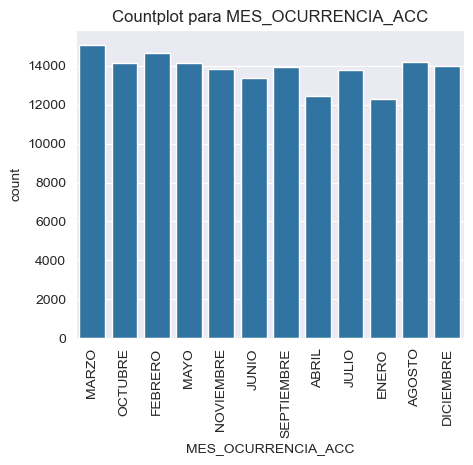

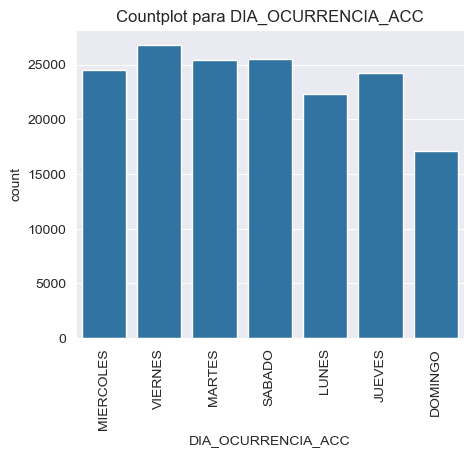

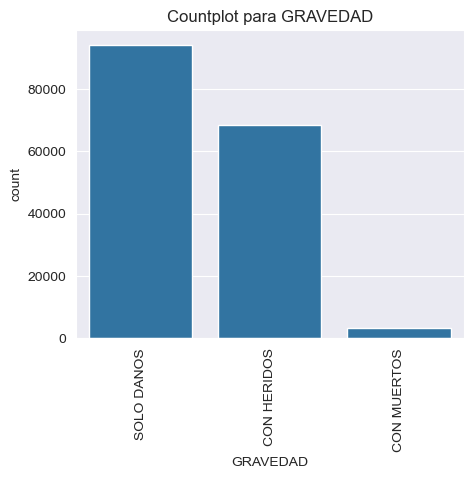

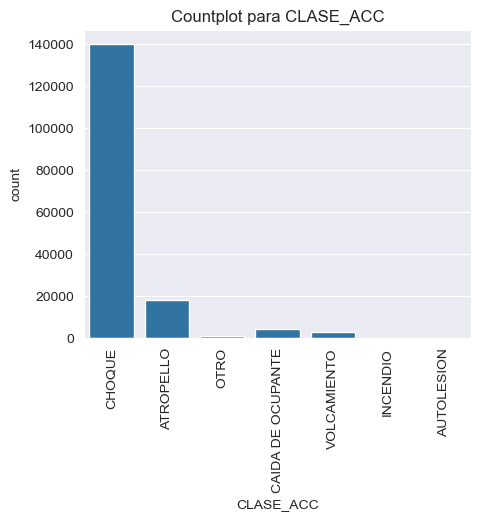

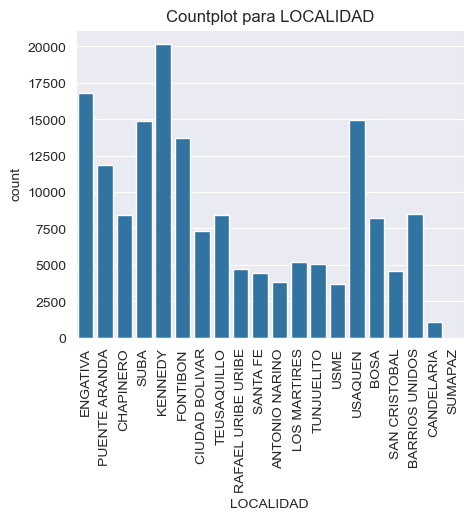

In [60]:
for col in analyzed_non_numeric_attributes:
    plt.figure(figsize=(5, 4))
    ax = sns.countplot(data=df, x=col)
    for label in ax.get_xticklabels():
        label.set_rotation(90)
    plt.title(f"Countplot para {col}")

    plt.show()

## 2. Variables numéricas por tipo de dato

Variables numéricas encontradas

In [61]:
numeric_attributes = df.select_dtypes(include=['number']).columns.values
pd.DataFrame(numeric_attributes, columns=['Numeric Attributes'])

,Numeric Attributes
0,ID
1,OBJECTID
2,CODIGO_ACCIDENTE
3,FECHA_OCURRENCIA_ACC
4,ANO_OCURRENCIA_ACC
5,FECHA_HORA_ACC
6,LATITUD
7,LONGITUD
8,CIV
9,PK_CALZADA


Conteo de filas, promedio, desviación estándar, valores mínimo y máximo junto a los cuartiles

In [62]:
df[numeric_attributes].describe()

,ID,OBJECTID,CODIGO_ACCIDENTE,FECHA_OCURRENCIA_ACC,ANO_OCURRENCIA_ACC,FECHA_HORA_ACC,LATITUD,LONGITUD,CIV,PK_CALZADA
count,165830.000000,165830.000000,1.658300e+05,1.658300e+05,165830.000000,1.658300e+05,165830.000000,165830.000000,1.654270e+05,1.652260e+05
mean,729878.822867,492365.225870,9.942467e+06,1.577073e+12,2019.474166,1.577121e+12,4.646771,-74.105771,1.163739e+07,1.747869e+07
std,95691.949287,144218.433336,2.124264e+06,6.743525e+10,2.132961,6.743532e+10,0.057964,0.040120,1.181077e+07,3.282184e+07
min,563210.000000,279824.000000,4.469074e+06,1.483247e+12,2017.000000,1.483250e+12,4.122000,-74.237218,0.000000e+00,0.000000e+00
25%,647005.250000,366649.500000,1.049138e+07,1.523596e+12,2018.000000,1.523622e+12,4.605619,-74.135855,6.002058e+06,1.746820e+05
50%,729776.000000,456043.000000,1.057742e+07,1.563340e+12,2019.000000,1.563389e+12,4.641638,-74.104700,1.000336e+07,3.881400e+05
75%,812743.250000,632645.750000,1.101445e+07,1.619154e+12,2021.000000,1.619210e+12,4.688594,-74.075136,1.300293e+07,2.411993e+07
max,895659.000000,892382.000000,1.133528e+07,1.757048e+12,2025.000000,1.757096e+12,4.825000,-74.010747,1.001191e+08,9.106576e+07


Valores únicos en cada columna

In [63]:
unique_counts = df[numeric_attributes].nunique()
print(unique_counts)

ID                      165830
OBJECTID                165830
CODIGO_ACCIDENTE        165830
FECHA_OCURRENCIA_ACC      3166
ANO_OCURRENCIA_ACC           9
FECHA_HORA_ACC          120976
LATITUD                  85919
LONGITUD                 85085
CIV                      36548
PK_CALZADA               44971
dtype: int64


**Hallazgos y notas:**

- Las columnas CIV y PK_CALZADA tienen valores nulos
- ID, OBJECTID, CODIGO_ACCIDENTE y FECHA_HORA_ACC tienen una alta cardinalidad
- Las fechas (FECHA_OCURRENCIA_ACC Y FECHA_HORA_ACC) están en un timestamp Unix de milisegundos, dado que las fechas recientes (2019 - 2022) están cerca de 1.6 × 10¹²
- Los años van correctamente desde 2017 hasta 2025
- La latitud y longitud es coherente
- CIV hace referencia al Código de Identificación Vial (CIV), lo que permite consultar segmentos viales
- Un segmento vial es un tramo continuo de una vía entre dos intersecciones consecutivas o entre dos puntos de quiebre definidos oficialmente
- PK_CALZADA hace referencia al código de la calzada
- Una calzada es una zona de la vía, destinada a la circulación de vehículos automotores o peatones (IDECA, 2021)
- Hay cerca de 36k segmentos viales y 44k calzadas

**Conversiones adecuadas:**

- De float a int:
    - CODIGO_ACCIDENTE 
    - ANO_OCURRENCIA_ACC
    - CIV
    - PK_CALZADA
- De int a fecha en UTC−05:00:
    - FECHA_OCURRENCIA_ACC
    - FECHA_HORA_ACC

**Referencias:**

IDECA (Infraestructura de Datos Espaciales de Bogotá). (31 de marzo de 2021). Calzada. Bogotá D.C. https://www.ideca.gov.co/recursos/mapas/calzada-bogota-dc

Visualización de esta información con diagramas de caja

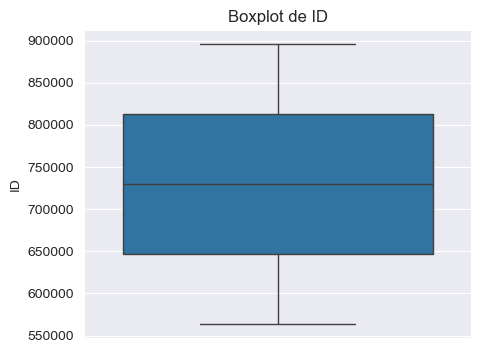

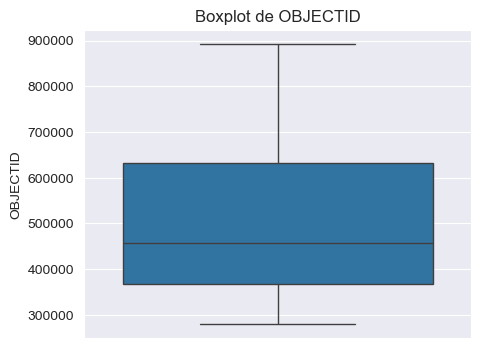

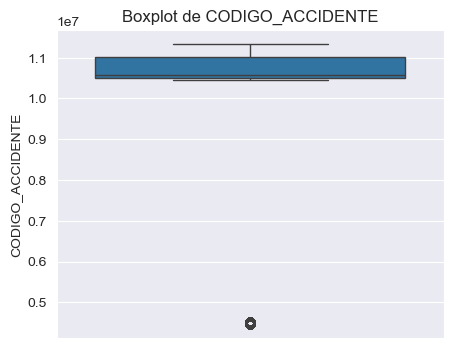

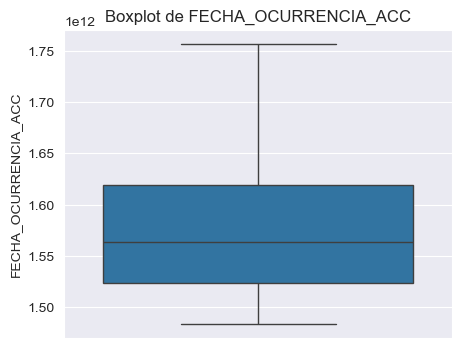

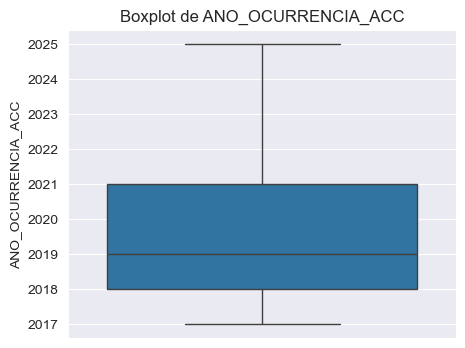

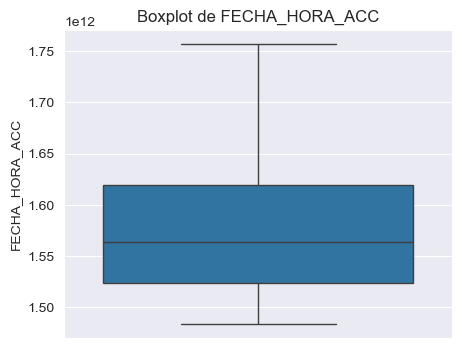

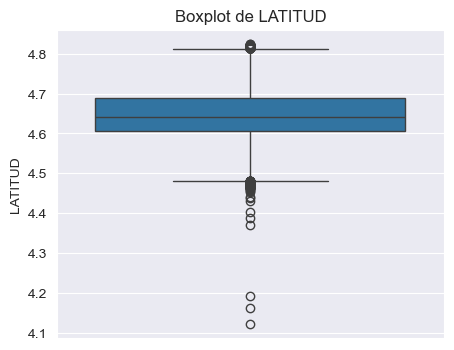

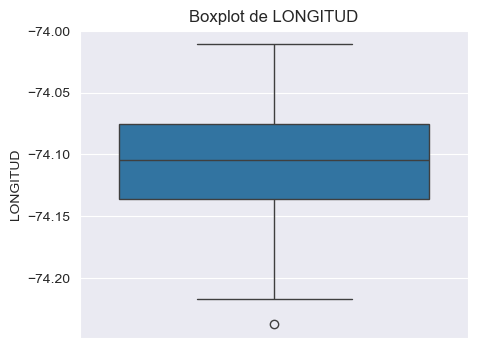

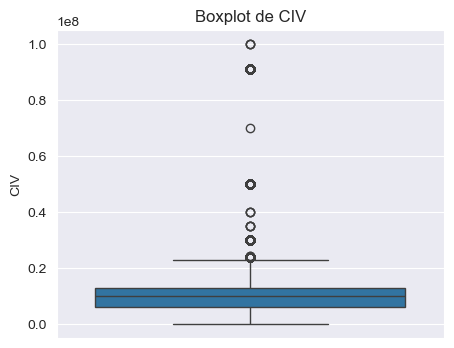

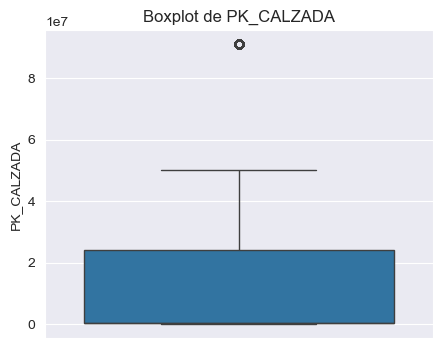

In [64]:
for c in numeric_attributes:
    plt.figure(figsize=(5, 4))          # tamaño de cada figura
    sns.boxplot(y=df[c])                # eje Y = columna
    plt.title(f"Boxplot de {c}")        # título
    plt.xlabel("")                      # sin etiqueta en X (opcional)
    plt.ylabel(c)                       # nombre de la variable
    plt.show()

**Hallazgos:**

- Los códigos de accidente inferiores (de 6 dígitos) son outliers o errores
- Los demás outliers son razonables

Histogramas para visualizar la distribución de cada columna

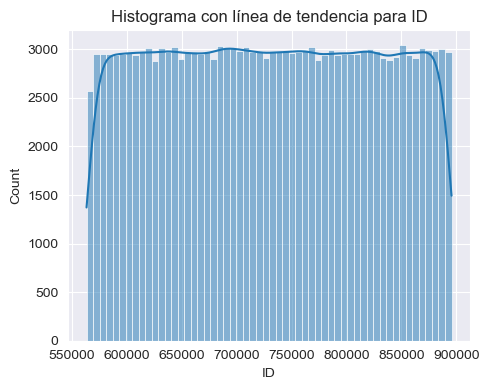

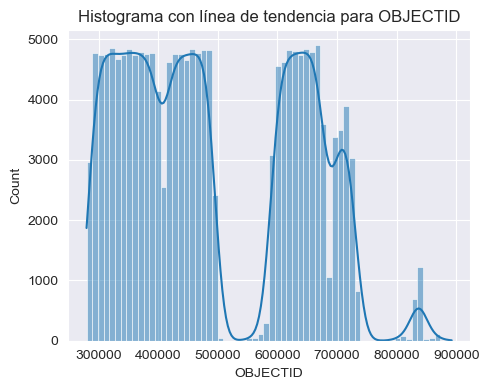

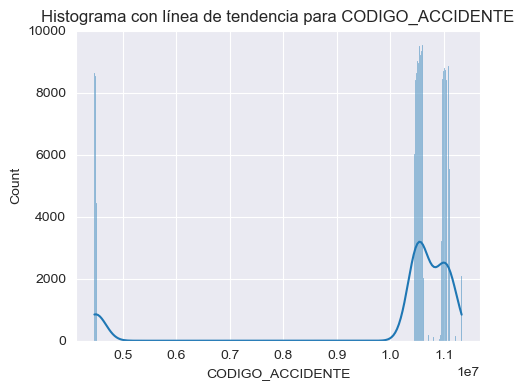

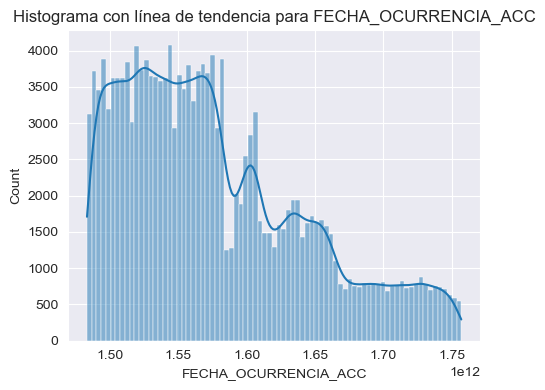

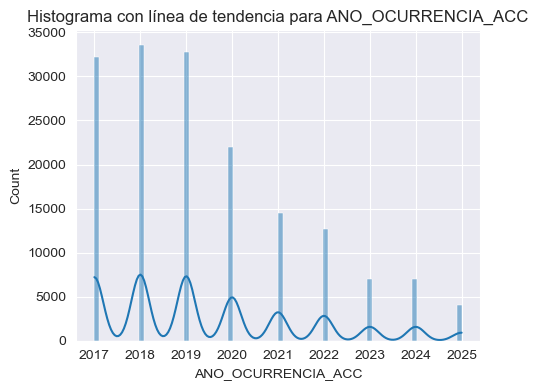

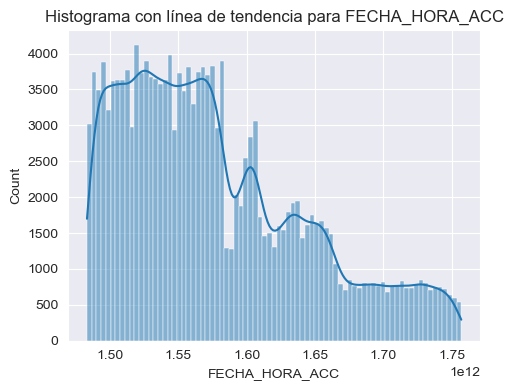

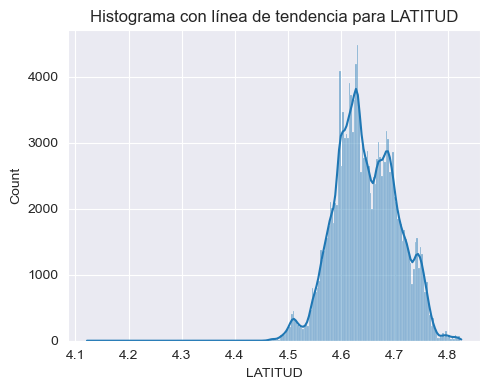

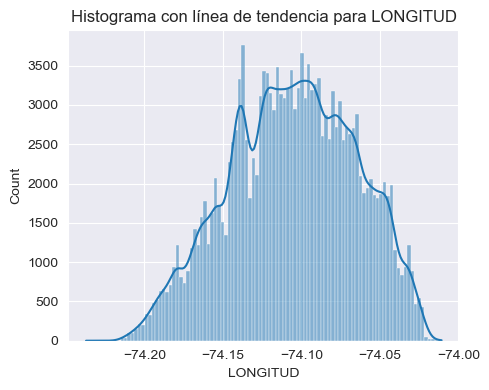

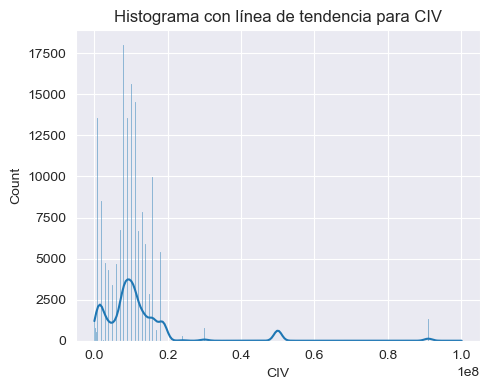

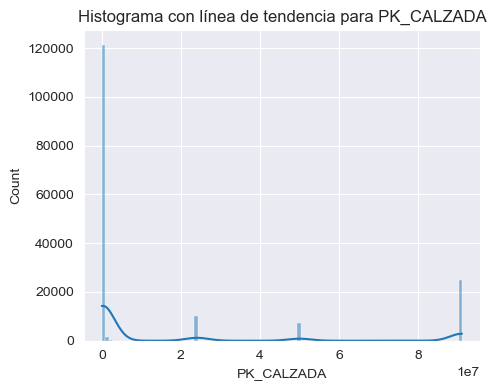

In [65]:
for col in numeric_attributes:
    plt.figure(figsize=(5,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Histograma con línea de tendencia para {col}")
    plt.tight_layout()
    plt.show()

**Hallazgos:**

- Ha disminuido notoriamente la cantidad de siniestros desde 2017 hasta 2025
- Son más comunes los siniestros registrados en segmentos viales con CIVs bajos
- Hay 5 rangos de identificadores de calzadas que concentran una cantidad importante de los siniestros, lo que resaltaría ciertas divisiones territoriales

## 3. Calidad de datos

### 3.1. Completitud

**Diagnóstico:** Se encontraron problemas menores

Valores de incompletitud para todas las columnas

In [66]:
incompleteness_percentages =  (100 * df.isnull().sum() / df.shape[0]).sort_values(ascending=False)
pd.DataFrame({
    "Attribute": incompleteness_percentages.index,
    "Completeness (%)": 100 - incompleteness_percentages.values
})

,Attribute,Completeness (%)
0,PK_CALZADA,99.635772
1,CIV,99.756980
2,ID,100.000000
3,FORMULARIO,100.000000
4,OBJECTID,100.000000
5,CODIGO_ACCIDENTE,100.000000
6,FECHA_OCURRENCIA_ACC,100.000000
7,MES_OCURRENCIA_ACC,100.000000
8,DIA_OCURRENCIA_ACC,100.000000
9,HORA_OCURRENCIA_ACC,100.000000


Evidenciamos que menos de un 1% de los valores de CIV y PK_CALZADA son nulos

Podemos utilizar el placeholder de 0 para indicar esto y poder realizar conversiones de tipos de dato. Además, en el dataset original este valor ya estaba incluido en su rango, por lo que es un buen placeholder.

In [67]:
df = df.fillna(0)

Corrección exitosa

In [68]:
incompleteness_percentages =  (100 * df.isnull().sum() / df.shape[0]).sort_values(ascending=False)
pd.DataFrame({
    "Attribute": incompleteness_percentages.index,
    "Completeness (%)": 100 - incompleteness_percentages.values
})

,Attribute,Completeness (%)
0,ID,100.0
1,OBJECTID,100.0
2,FORMULARIO,100.0
3,CODIGO_ACCIDENTE,100.0
4,FECHA_OCURRENCIA_ACC,100.0
5,HORA_OCURRENCIA_ACC,100.0
6,ANO_OCURRENCIA_ACC,100.0
7,MES_OCURRENCIA_ACC,100.0
8,DIA_OCURRENCIA_ACC,100.0
9,DIRECCION,100.0


### 3.2. Unicidad

**Diagnóstico:** No se encontraron problemas

Cantidad de filas duplicadas

In [69]:
total_duplicate_rows = df.duplicated().sum()
duplicate_rows_percentage = 100.0 * total_duplicate_rows / df.shape[0]
print(f"{total_duplicate_rows} duplicate rows ({duplicate_rows_percentage:.2f}%)")

0 duplicate rows (0.00%)


Cantidad de valores duplicados por cada columna

In [70]:
duplicate_counts = []
duplicate_percentages = []

for col in df.columns:
    duplicates = df.shape[0] - df[col].nunique()
    duplicate_counts.append(duplicates)
    duplicate_percentages.append((duplicates / df.shape[0]) * 100)

duplicates_df = pd.DataFrame({
    "Column": df.columns,
    "Duplicate Count": duplicate_counts,
    "Duplicate Percentage": duplicate_percentages
}).sort_values(by="Duplicate Count", ascending=False).reset_index(drop=True)

duplicates_df

,Column,Duplicate Count,Duplicate Percentage
0,MUNICIPIO,165829,99.999397
1,GRAVEDAD,165827,99.998191
2,CLASE_ACC,165823,99.995779
3,DIA_OCURRENCIA_ACC,165823,99.995779
4,ANO_OCURRENCIA_ACC,165821,99.994573
5,MES_OCURRENCIA_ACC,165818,99.992764
6,LOCALIDAD,165810,99.987939
7,HORA_OCURRENCIA_ACC,164390,99.131641
8,FECHA_OCURRENCIA_ACC,162664,98.090816
9,CIV,129282,77.960562


## 4. Conversiones de columnas

Convertimos las columnas de float a int

In [71]:
cols = ["CODIGO_ACCIDENTE", "ANO_OCURRENCIA_ACC", "CIV", "PK_CALZADA"]
df = df.astype({c: "int" for c in cols})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165830 entries, 0 to 165829
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    165830 non-null  int64  
 1   OBJECTID              165830 non-null  int64  
 2   FORMULARIO            165830 non-null  object 
 3   CODIGO_ACCIDENTE      165830 non-null  int64  
 4   FECHA_OCURRENCIA_ACC  165830 non-null  int64  
 5   HORA_OCURRENCIA_ACC   165830 non-null  object 
 6   ANO_OCURRENCIA_ACC    165830 non-null  int64  
 7   MES_OCURRENCIA_ACC    165830 non-null  object 
 8   DIA_OCURRENCIA_ACC    165830 non-null  object 
 9   DIRECCION             165830 non-null  object 
 10  GRAVEDAD              165830 non-null  object 
 11  CLASE_ACC             165830 non-null  object 
 12  LOCALIDAD             165830 non-null  object 
 13  MUNICIPIO             165830 non-null  object 
 14  FECHA_HORA_ACC        165830 non-null  int64  
 15  

Guardamos las fechas convertidas en otras columnas

In [72]:
df["FECHA_OCURRENCIA_ACC"] = (
    pd.to_datetime(df["FECHA_OCURRENCIA_ACC"], unit="ms", origin="unix")
      .dt.tz_localize("UTC")
      .dt.tz_convert("America/Bogota")
      .dt.date
)

df["FECHA_OCURRENCIA_ACC"].head()

0    2022-03-16
1    2019-10-18
2    2019-10-04
3    2017-02-08
4    2017-05-30
Name: FECHA_OCURRENCIA_ACC, dtype: object

In [73]:
df["FECHA_HORA_ACC"] = (
    pd.to_datetime(df["FECHA_HORA_ACC"], unit="ms", origin="unix")
      .dt.tz_localize("UTC")
      .dt.tz_convert("America/Bogota")
      .dt.strftime("%Y-%m-%d %H:%M")
)

df["FECHA_HORA_ACC"].head()

0    2022-03-16 06:34
1    2019-10-18 19:30
2    2019-10-04 09:15
3    2017-02-08 10:00
4    2017-05-30 17:50
Name: FECHA_HORA_ACC, dtype: object

Finalmente, como las horas no guardan segundos, podemos estandarizar:

In [74]:
df["HORA_OCURRENCIA_ACC"].str.endswith(":00").all()

np.True_

In [75]:
df["HORA_OCURRENCIA_ACC"] = df["HORA_OCURRENCIA_ACC"].str.replace(r":00$", "", regex=True)
df["HORA_OCURRENCIA_ACC"].head()

0    06:34
1    19:30
2    09:15
3    10:00
4    17:50
Name: HORA_OCURRENCIA_ACC, dtype: object

## 5. Sampling para visualización

Resultado de las transformaciones

In [76]:
df.head()

,ID,OBJECTID,FORMULARIO,CODIGO_ACCIDENTE,FECHA_OCURRENCIA_ACC,HORA_OCURRENCIA_ACC,ANO_OCURRENCIA_ACC,MES_OCURRENCIA_ACC,DIA_OCURRENCIA_ACC,DIRECCION,GRAVEDAD,CLASE_ACC,LOCALIDAD,MUNICIPIO,FECHA_HORA_ACC,LATITUD,LONGITUD,CIV,PK_CALZADA
0,840142,451106,A001393604,10565887,2022-03-16,06:34,2022,MARZO,MIERCOLES,KR 86 72 02,SOLO DANOS,CHOQUE,ENGATIVA,BOGOTA DC,2022-03-16 06:34,4.696000,-74.106000,10006480,514011
1,747565,728008,AA001057402,11115230,2019-10-18,19:30,2019,OCTUBRE,VIERNES,KR 50-CL 3 2,CON HERIDOS,CHOQUE,PUENTE ARANDA,BOGOTA DC,2019-10-18 19:30,4.615541,-74.114489,16004606,513766
2,744198,372498,A001055948,10499024,2019-10-04,09:15,2019,OCTUBRE,VIERNES,KR 7-CL 71 21,SOLO DANOS,CHOQUE,CHAPINERO,BOGOTA DC,2019-10-04 09:15,4.654296,-74.055749,2001162,36812
3,570467,631431,AA000552205,11001813,2017-02-08,10:00,2017,FEBRERO,MIERCOLES,AV AVENIDA BOYACA-CL 127 02,SOLO DANOS,CHOQUE,SUBA,BOGOTA DC,2017-02-08 10:00,4.709924,-74.079962,11010306,604024
4,590737,303501,A000607860,4483415,2017-05-30,17:50,2017,MAYO,MARTES,KR 79F-CL 47B S 02,CON HERIDOS,ATROPELLO,KENNEDY,BOGOTA DC,2017-05-30 17:50,4.618101,-74.168603,8007308,245247


Guardar el dataset transformado

In [77]:
df.to_csv("datos_finales.csv", index=False, encoding="utf-8")

Guardar el dataset muestreado al 20%

In [78]:
muestra = df.sample(frac=0.2, random_state=42)
muestra.to_csv("datos_muestra.csv", index=False, encoding="utf-8")